# Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import datetime
from pandas_datareader import data as pdr
import yfinance as yf

import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
ind_prod_goods = pd.read_csv('daily_industrial_production.csv')
bill_rates = pd.read_csv('daily_3_month_tbill_rate.csv')
equity_mkt_vol = pd.read_csv('EMV_IDT Index.csv')
unemployment = pd.read_csv('daily_unemployment_rate.csv')
equity_mkt_uncertainty = pd.read_csv('EMU Index.csv')
equity_policy_uncertainty = pd.read_csv('EPU Index.csv')

equity_trading_funds = pd.read_csv('ETFs_daily.csv')

In [3]:
print(ind_prod_goods.head())
print(bill_rates.head())
print(equity_mkt_vol.head())
print(unemployment.head())
print(equity_mkt_uncertainty.head())
print(equity_policy_uncertainty.head())

print(equity_trading_funds.head())

         DATE     IPCONGD
0  2008-01-01  108.870600
1  2008-01-02  108.865429
2  2008-01-03  108.860258
3  2008-01-04  108.855087
4  2008-01-05  108.849916
         DATE  DTB3
0  2008-01-01   NaN
1  2008-01-02  3.18
2  2008-01-03  3.16
3  2008-01-04  3.12
4  2008-01-07  3.19
         DATE INFECTDISEMVTRACKD
0  2008-01-01            0.68000
1  2008-01-02            0.47000
2  2008-01-03            0.36000
3  2008-01-04            0.00000
4  2008-01-05            0.00000
         DATE    UNRATE
0  2008-01-01  5.000000
1  2008-01-02  4.996774
2  2008-01-03  4.993548
3  2008-01-04  4.990323
4  2008-01-05  4.987097
       DATE  WLEMUINDXD
0  1/1/2008      149.95
1  2/1/2008       97.01
2  3/1/2008       12.12
3  4/1/2008       45.17
4  5/1/2008      143.82
         DATE  USEPUINDXD
0  2008-01-01      232.87
1  2008-01-02       83.14
2  2008-01-03      189.34
3  2008-01-04      103.24
4  2008-01-05      281.75
         Date        DBA        GLD         USO
0  2008-01-02  30.408634  84.86000

In [4]:
ind_prod_goods.rename(columns={'DATE': 'date', 'IPCONGD': 'ind_prod_goods'}, inplace=True)
ind_prod_goods['date'] = pd.to_datetime(ind_prod_goods['date'])
ind_prod_goods.sort_values('date', inplace=True)

bill_rates.rename(columns={'DATE': 'date', 'DTB3': 'bill_rates'}, inplace=True)
bill_rates['date'] = pd.to_datetime(bill_rates['date'])
bill_rates.sort_values('date', inplace=True)

equity_mkt_vol.rename(columns={'DATE': 'date', 'INFECTDISEMVTRACKD': 'equity_mkt_vol'}, inplace=True)
equity_mkt_vol['date'] = pd.to_datetime(equity_mkt_vol['date'])
equity_mkt_vol.sort_values('date', inplace=True)

unemployment.rename(columns={'DATE': 'date', 'UNRATE': 'unemployment'}, inplace=True)
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment.sort_values('date', inplace=True)

equity_mkt_uncertainty.rename(columns={'DATE': 'date', 'WLEMUINDXD': 'equity_mkt_uncertainty'}, inplace=True)
equity_mkt_uncertainty['date'] = pd.to_datetime(equity_mkt_uncertainty['date'], format='%d/%m/%Y')
equity_mkt_uncertainty.sort_values('date', inplace=True)

equity_policy_uncertainty.rename(columns={'DATE': 'date', 'USEPUINDXD': 'equity_policy_uncertainty'}, inplace=True)
equity_policy_uncertainty['date'] = pd.to_datetime(equity_policy_uncertainty['date'])
equity_policy_uncertainty.sort_values('date', inplace=True)

equity_trading_funds.rename(columns={'Date': 'date', 'DBA': 'ETF_DBA', 'GLD': 'ETF_GLD', 'USO': 'ETF_USO'},
                            inplace=True)
equity_trading_funds['date'] = pd.to_datetime(equity_trading_funds['date'])
equity_trading_funds.sort_values('date', inplace=True)

In [5]:
print(ind_prod_goods.head())
print(bill_rates.head())
print(equity_mkt_vol.head())
print(unemployment.head())
print(equity_mkt_uncertainty.head())
print(equity_policy_uncertainty.head())
print(equity_trading_funds.head())

        date  ind_prod_goods
0 2008-01-01      108.870600
1 2008-01-02      108.865429
2 2008-01-03      108.860258
3 2008-01-04      108.855087
4 2008-01-05      108.849916
        date  bill_rates
0 2008-01-01         NaN
1 2008-01-02        3.18
2 2008-01-03        3.16
3 2008-01-04        3.12
4 2008-01-07        3.19
        date equity_mkt_vol
0 2008-01-01        0.68000
1 2008-01-02        0.47000
2 2008-01-03        0.36000
3 2008-01-04        0.00000
4 2008-01-05        0.00000
        date  unemployment
0 2008-01-01      5.000000
1 2008-01-02      4.996774
2 2008-01-03      4.993548
3 2008-01-04      4.990323
4 2008-01-05      4.987097
        date  equity_mkt_uncertainty
0 2008-01-01                  149.95
1 2008-01-02                   97.01
2 2008-01-03                   12.12
3 2008-01-04                   45.17
4 2008-01-05                  143.82
        date  equity_policy_uncertainty
0 2008-01-01                     232.87
1 2008-01-02                      83.14
2 20

In [6]:
merged_df = ind_prod_goods.merge(bill_rates, on='date', how='inner')
merged_df = merged_df.merge(equity_mkt_vol, on='date', how='inner')
merged_df = merged_df.merge(unemployment, on='date', how='inner')
merged_df = merged_df.merge(equity_mkt_uncertainty, on='date', how='inner')
merged_df = merged_df.merge(equity_policy_uncertainty, on='date', how='inner')

merged_df_dba = merged_df.merge(equity_trading_funds[['date', 'ETF_DBA']], on='date', how='inner')
merged_df_dba.dropna(axis=0, how='any', inplace=True) 
merged_df_dba.to_csv('Merged_Dataset_DBA.csv', index=False)
merged_df_dba.isnull().sum()
merged_df_dba.info()


merged_df_gld = merged_df.merge(equity_trading_funds[['date', 'ETF_GLD']], on='date', how='inner')
merged_df_gld.dropna(axis=0, how='any', inplace=True)  
merged_df_gld.to_csv('Merged_Dataset_GLD.csv', index=False)
merged_df_gld.isnull().sum()
merged_df_gld.info()

merged_df_uso = merged_df.merge(equity_trading_funds[['date', 'ETF_USO']], on='date', how='inner')
merged_df_uso.dropna(axis=0, how='any', inplace=True)  
merged_df_uso.to_csv('Merged_Dataset_USO.csv', index=False)
merged_df_uso.isnull().sum()
merged_df_uso.info()

date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_DBA                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_DBA                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 284.0+ KB


date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_GLD                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_GLD                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 284.0+ KB


date                         0
ind_prod_goods               0
bill_rates                   0
equity_mkt_vol               0
unemployment                 0
equity_mkt_uncertainty       0
equity_policy_uncertainty    0
ETF_USO                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_USO                    4039 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 284.0+ KB


# Feature Engineering

In [7]:
# Define your feature calculation functions
def calculate_sma(data, window, column_name):
    """Calculate Simple Moving Average."""
    data[f"SMA_{window}"] = data[column_name].rolling(window).mean()
    return data

def calculate_ema(data, window, column_name):
    """Calculate Exponential Moving Average."""
    data[f"EMA_{window}"] = data[column_name].ewm(span=window, ignore_na=True).mean()
    return data

def calculate_macd(data, column_name, short_window=12, long_window=26, signal_window=9):
    """Calculate Moving Average Convergence Divergence."""
    short_ema = data[column_name].ewm(span=short_window, adjust=False).mean()
    long_ema = data[column_name].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    data["MACD"] = macd_line
    data["MACD_SIGNAL"] = signal_line
    return data

def calculate_mfi(data, column_name, period=14):
    """Calculate Money Flow Index."""
    tp = (data['High'] + data['Low'] + data[column_name]) / 3
    rmf = tp * data['Volume']
    pos_flow = ((tp.diff() > 0) * rmf).rolling(window=period).sum()
    neg_flow = ((tp.diff() < 0) * rmf).rolling(window=period).sum()
    mfi = 100 - (100 / (1 + (pos_flow / neg_flow)))
    data["MFI"] = mfi
    return data

def calculate_obv(data, column_name):
    """Calculate On-Balance Volume."""
    obv = [0]
    for i in range(1, len(data)):
        if data[column_name][i] > data[column_name][i-1]:
            obv.append(obv[-1] + data['Volume'][i])
        elif data[column_name][i] < data[column_name][i-1]:
            obv.append(obv[-1] - data['Volume'][i])
        else:
            obv.append(obv[-1])
    data["OBV"] = obv
    return data

def calculate_rsi(data, column_name, period, use_ema=True):
    """Calculate Relative Strength Index."""
    delta = data[column_name].diff()
    up, down = delta.clip(lower=0), -delta.clip(upper=0)
    if use_ema:
        ma_up = up.ewm(com=period-1, adjust=True).mean()
        ma_down = down.ewm(com=period-1, adjust=True).mean()
    else:
        ma_up = up.rolling(window=period).mean()
        ma_down = down.rolling(window=period).mean()
    rsi = 100 - (100 / (1 + ma_up / ma_down))
    data[f"RSI_{period}"] = rsi
    return data

def calculate_stochastic(data, column_name, window):
    """Calculate Stochastic Oscillator."""
    low_min = data[column_name].rolling(window=window).min()
    high_max = data[column_name].rolling(window=window).max()
    data[f"STOCH_{window}_k"] = 100 * (data[column_name] - low_min) / (high_max - low_min)
    data[f"STOCH_{window}_d"] = data[f"STOCH_{window}_k"].rolling(window=3).mean()
    return data

def calculate_wad(data, column_name):
    """Calculate Williams Accumulation Distribution."""
    mfm = ((data[column_name] - data['Low']) - (data['High'] - data[column_name])) / (data['High'] - data['Low'])
    data['WAD'] = (mfm * data['Volume']).cumsum()
    return data

def calculate_rate_of_change(data, window, column_name):
    """Calculate Rate of Change."""
    data[f"ROC_{window}"] = data[column_name].pct_change(periods=window) * 100
    return data

def calculate_lagged_features(data, column_name, lags):
    """Calculate Lagged Features."""
    for lag in range(1, lags + 1):
        data[f"LAG_{lag}"] = data[column_name].shift(lag)
    return data

def create_signals(df, column_name):
    """ Create signals based on price movement: 1 for up, 0 for down """
    df['Previous'] = df[column_name].shift(1)
    df['Signal'] = (df[column_name] > df['Previous']).astype(int)
    df.drop(['Previous'], axis=1, inplace=True)
    return df

def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [8]:
merged_df_dba = calculate_sma(merged_df_dba, 50, 'ETF_DBA')
merged_df_dba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4039 entries, 0 to 4068
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4039 non-null   datetime64[ns]
 1   ind_prod_goods             4039 non-null   float64       
 2   bill_rates                 4039 non-null   float64       
 3   equity_mkt_vol             4039 non-null   object        
 4   unemployment               4039 non-null   float64       
 5   equity_mkt_uncertainty     4039 non-null   float64       
 6   equity_policy_uncertainty  4039 non-null   float64       
 7   ETF_DBA                    4039 non-null   float64       
 8   SMA_50                     3990 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 315.5+ KB


In [9]:
# Main code to generate the data
start_date = datetime.date(2008, 1, 1)  # 设置起始日期为2008年1月1日
end_date = datetime.date(2024, 3, 31)   # 设置结束日期为2024年3月31日
datasets = [merged_df_dba, merged_df_gld, merged_df_uso]
ticker_columns = ['ETF_DBA', 'ETF_GLD', 'ETF_USO']

# 定义文件名
filenames = ['DBA_with_indicators.csv', 'GLD_with_indicators.csv', 'USO_with_indicators.csv']

# 循环数据集和文件名
for dataset, ticker_column, filename in zip(datasets, ticker_columns, filenames):
    df = dataset.copy()
    
    # 添加特征计算过程
    sma_list = [50, 200]
    ema_list = [10, 30, 200]
    rsi_list = [10, 30, 200]
    stochastic_list = [10, 30, 200]
    rate_of_change_list = [10, 30]

    for val in sma_list:
        df = calculate_sma(df, val, ticker_column)

    for val in ema_list:
        df = calculate_ema(df, val, ticker_column)

    df = calculate_macd(df, ticker_column)
    # df = calculate_mfi(df, ticker_column)
    # df = calculate_obv(df, ticker_column)

    for val in rsi_list:
        df = calculate_rsi(df, ticker_column, val)

    for val in stochastic_list:
        df = calculate_stochastic(df, ticker_column, val)

    for val in rate_of_change_list:
        df = calculate_rate_of_change(df, val, ticker_column)

    # df = calculate_wad(df, ticker_column)

    # 假设'df'中已经有名为'Date'的列
    df.set_index('date', inplace=True)  # 将'Date'列设置为索引
    
    # 获取数据并合并
    additional_tickers = ["^VIX", "^OVX", "^VXN", "EPU", "ADX.AX"]
    for additional_ticker in additional_tickers:
        additional_df = get_data(additional_ticker, start_date, end_date)
    
        # 使用merge来合并数据，确保按照日期索引对齐
        df = df.merge(additional_df['Adj Close'].rename(f"{additional_ticker}"), left_index=True, right_index=True, how='left')




    df["returns"] = np.log(df[ticker_column] / df[ticker_column].shift(1))

    lags = 5
    df = calculate_lagged_features(df, "returns", lags)

    # df = df.dropna()

    # 将处理好的 DataFrame 保存到 CSV
    df.to_csv(filename, index=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [10]:
dba_with_indicators = pd.read_csv('DBA_with_indicators.csv')
gld_with_indicators = pd.read_csv('GLD_with_indicators.csv')
uso_with_indicators = pd.read_csv('USO_with_indicators.csv')

dba_with_indicators.dropna(axis=0, how='any', inplace=True) 
gld_with_indicators.dropna(axis=0, how='any', inplace=True) 
uso_with_indicators.dropna(axis=0, how='any', inplace=True) 

dba_with_indicators['PnL'] = np.sign(dba_with_indicators['returns'])
gld_with_indicators['PnL'] = np.sign(gld_with_indicators['returns'])
uso_with_indicators['PnL'] = np.sign(uso_with_indicators['returns'])
dba_with_indicators['PnL'] = dba_with_indicators['PnL'].clip(lower=0)
gld_with_indicators['PnL'] = gld_with_indicators['PnL'].clip(lower=0)
uso_with_indicators['PnL'] = uso_with_indicators['PnL'].clip(lower=0)

dba_with_indicators.info()
gld_with_indicators.info()
uso_with_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3594 entries, 368 to 4038
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ind_prod_goods             3594 non-null   float64
 1   bill_rates                 3594 non-null   float64
 2   equity_mkt_vol             3594 non-null   object 
 3   unemployment               3594 non-null   float64
 4   equity_mkt_uncertainty     3594 non-null   float64
 5   equity_policy_uncertainty  3594 non-null   float64
 6   ETF_DBA                    3594 non-null   float64
 7   SMA_50                     3594 non-null   float64
 8   SMA_200                    3594 non-null   float64
 9   EMA_10                     3594 non-null   float64
 10  EMA_30                     3594 non-null   float64
 11  EMA_200                    3594 non-null   float64
 12  MACD                       3594 non-null   float64
 13  MACD_SIGNAL                3594 non-null   flo

In [11]:
features_to_scale_dba = ['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
                         'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
                         'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
                         'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
                         'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
                         'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
                         'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5']

features_to_scale_gld = ['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
                         'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_GLD',
                         'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
                         'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
                         'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
                         'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
                         'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5']

features_to_scale_uso = ['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
                         'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_USO',
                         'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
                         'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
                         'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
                         'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
                         'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5']

# dba_with_indicators = dba_with_indicators[features_to_scale_dba]
# gld_with_indicators = gld_with_indicators[features_to_scale_gld]
# uso_with_indicators = uso_with_indicators[features_to_scale_uso]

for column in features_to_scale_dba:
    dba_with_indicators.loc[:, column] = pd.to_numeric(dba_with_indicators.loc[:, column], errors='coerce')
for column in features_to_scale_gld:
    gld_with_indicators.loc[:, column] = pd.to_numeric(gld_with_indicators.loc[:, column], errors='coerce')
for column in features_to_scale_uso:
    uso_with_indicators.loc[:, column] = pd.to_numeric(uso_with_indicators.loc[:, column], errors='coerce')

dba_with_indicators.loc[:, features_to_scale_dba] = dba_with_indicators[features_to_scale_dba].fillna(
    dba_with_indicators[features_to_scale_dba].mean())
gld_with_indicators.loc[:, features_to_scale_gld] = gld_with_indicators[features_to_scale_gld].fillna(
    gld_with_indicators[features_to_scale_gld].mean())
uso_with_indicators.loc[:, features_to_scale_uso] = uso_with_indicators[features_to_scale_uso].fillna(
    uso_with_indicators[features_to_scale_uso].mean())

scaler = StandardScaler()
dba_with_indicators.loc[:, features_to_scale_dba] = scaler.fit_transform(dba_with_indicators[features_to_scale_dba])
gld_with_indicators.loc[:, features_to_scale_gld] = scaler.fit_transform(gld_with_indicators[features_to_scale_gld])
uso_with_indicators.loc[:, features_to_scale_uso] = scaler.fit_transform(uso_with_indicators[features_to_scale_uso])

In [12]:
dba_with_indicators.columns

Index(['ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
       'equity_mkt_uncertainty', 'equity_policy_uncertainty', 'ETF_DBA',
       'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
       'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
       'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
       'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX', 'returns',
       'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5', 'PnL'],
      dtype='object')

In [13]:
def heatmap_for_indicators(df, df_name):
    internal_chars = [
        'ind_prod_goods', 'bill_rates', 'equity_mkt_vol', 'unemployment',
        'equity_mkt_uncertainty', 'equity_policy_uncertainty',
        'SMA_50', 'SMA_200', 'EMA_10', 'EMA_30', 'EMA_200', 'MACD',
        'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'RSI_200', 'STOCH_10_k',
        'STOCH_10_d', 'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d',
        'ROC_10', 'ROC_30', '^VIX', '^OVX', '^VXN', 'EPU', 'ADX.AX',
        'LAG_1', 'LAG_2', 'LAG_3', 'LAG_4', 'LAG_5'
    ]

    corrmat = df[internal_chars].corr()

    plt.subplots(figsize=(20, 16))
    sns.heatmap(corrmat, square=False, linewidths=.5, annot=True, cmap='coolwarm')

    plt.title(f"Correlation Heatmap for {df_name}")

    plt.show()


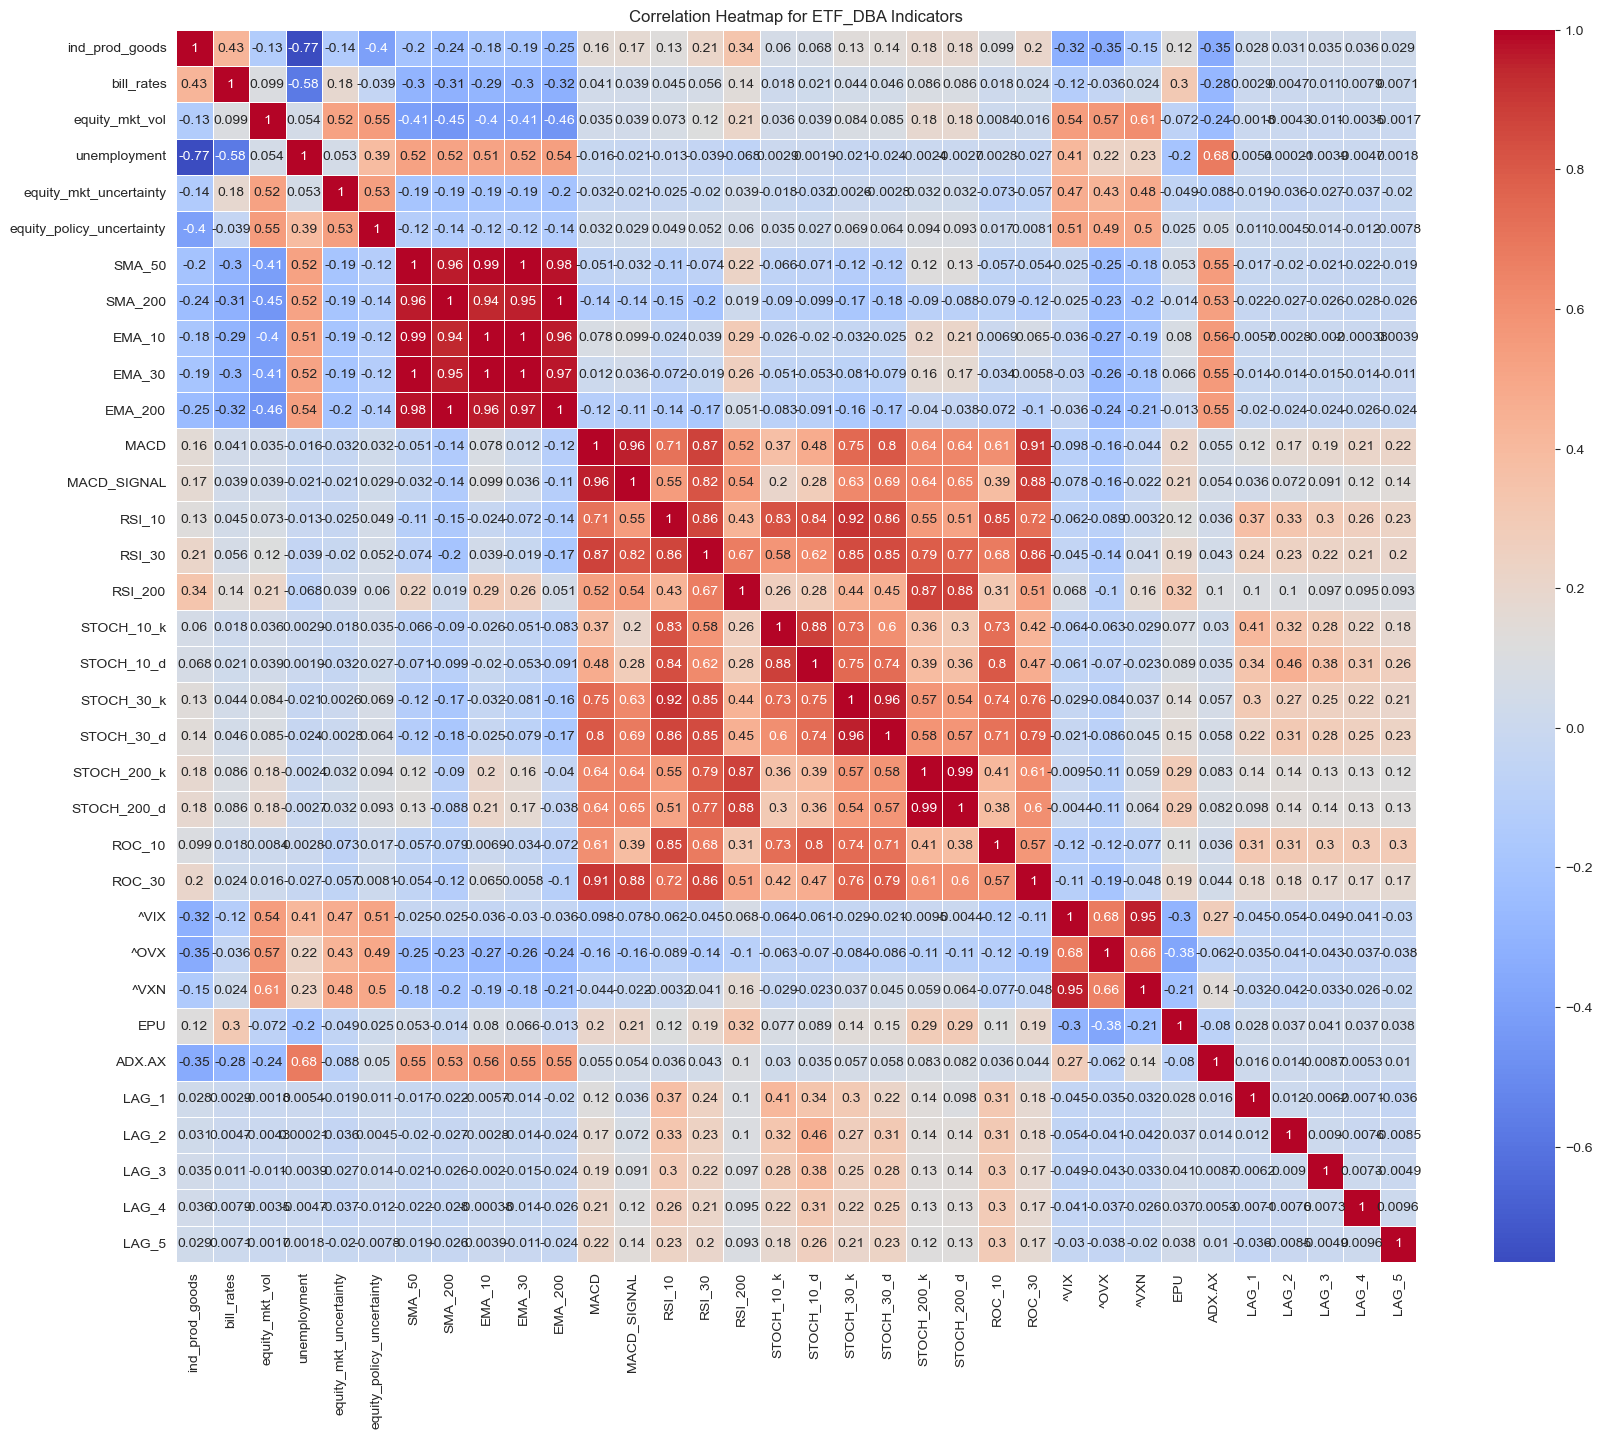

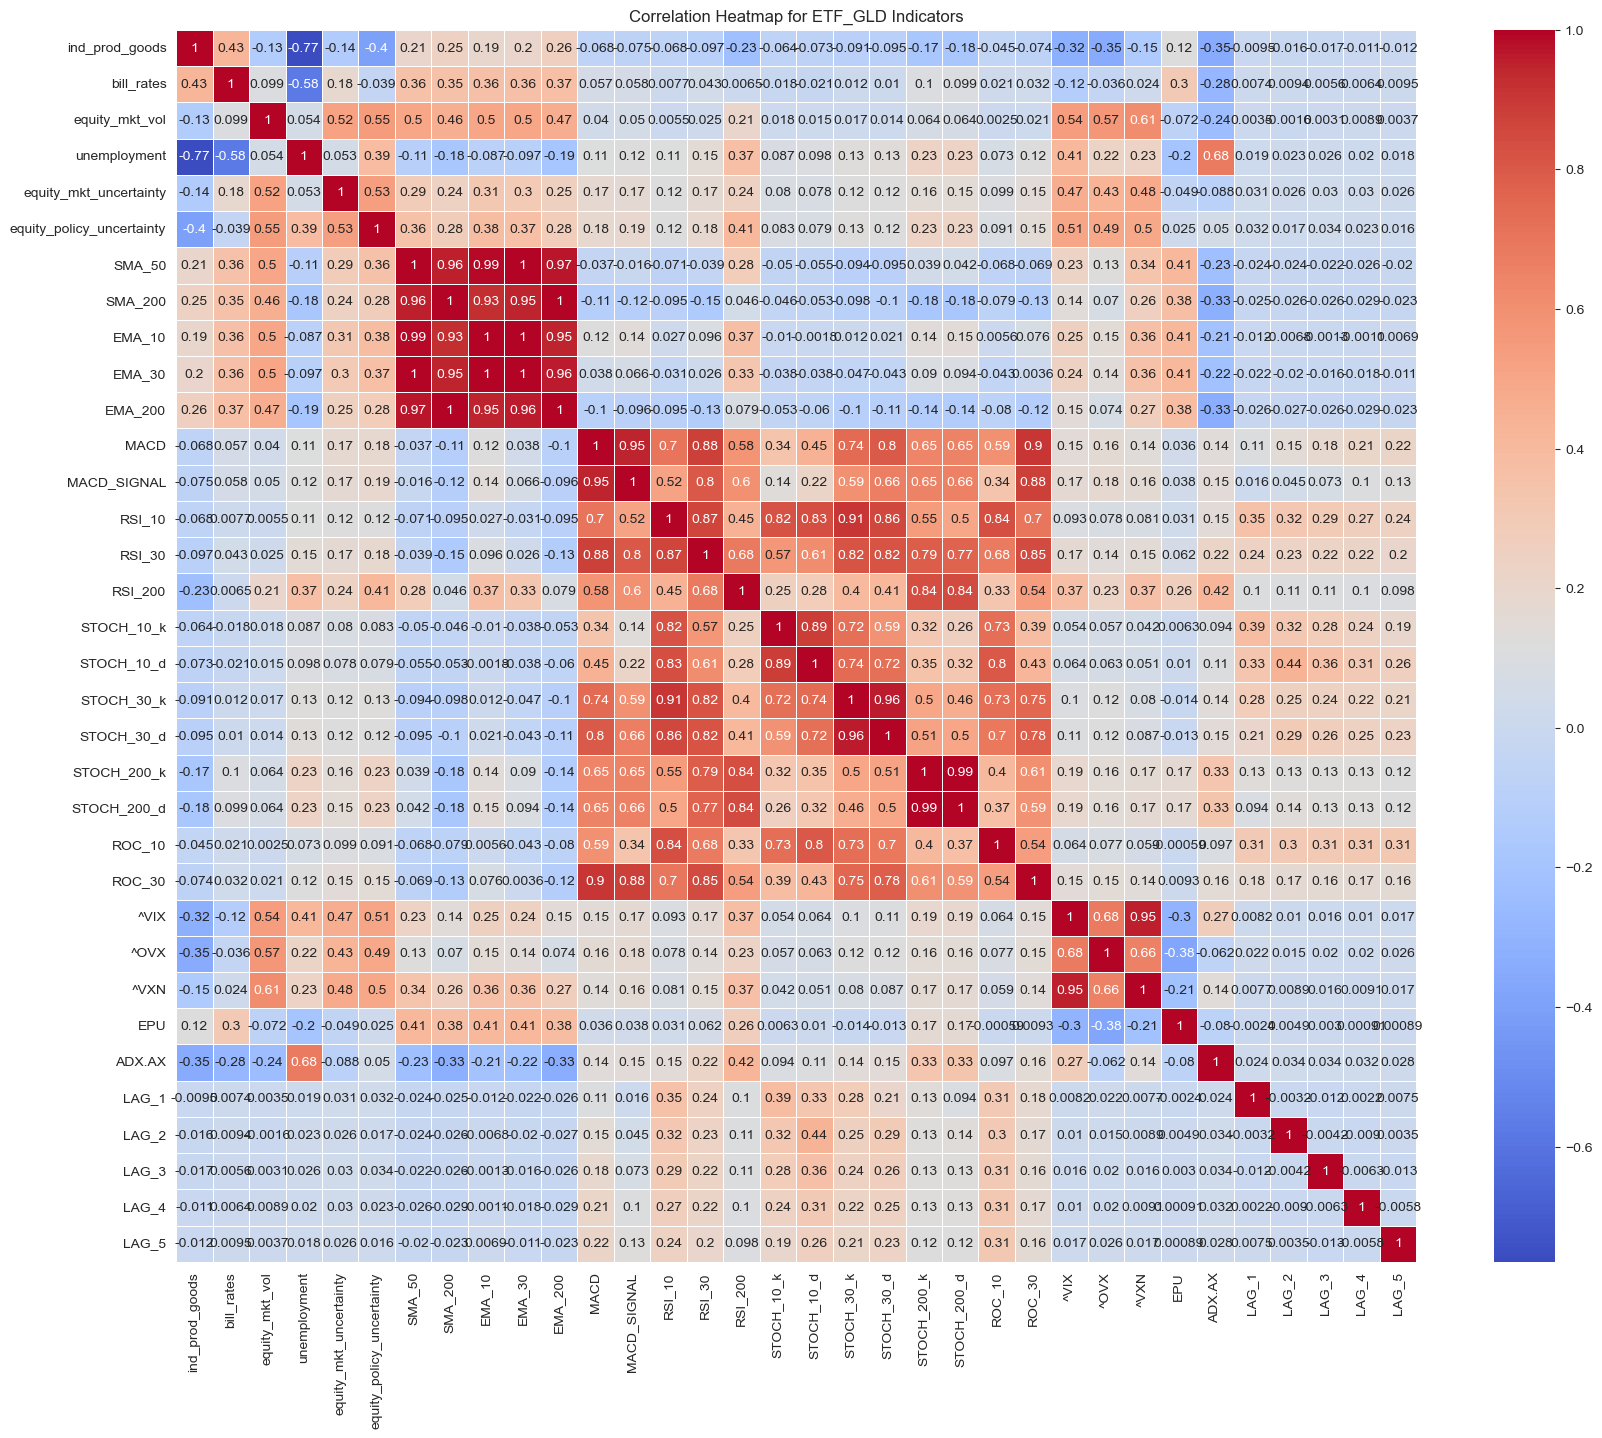

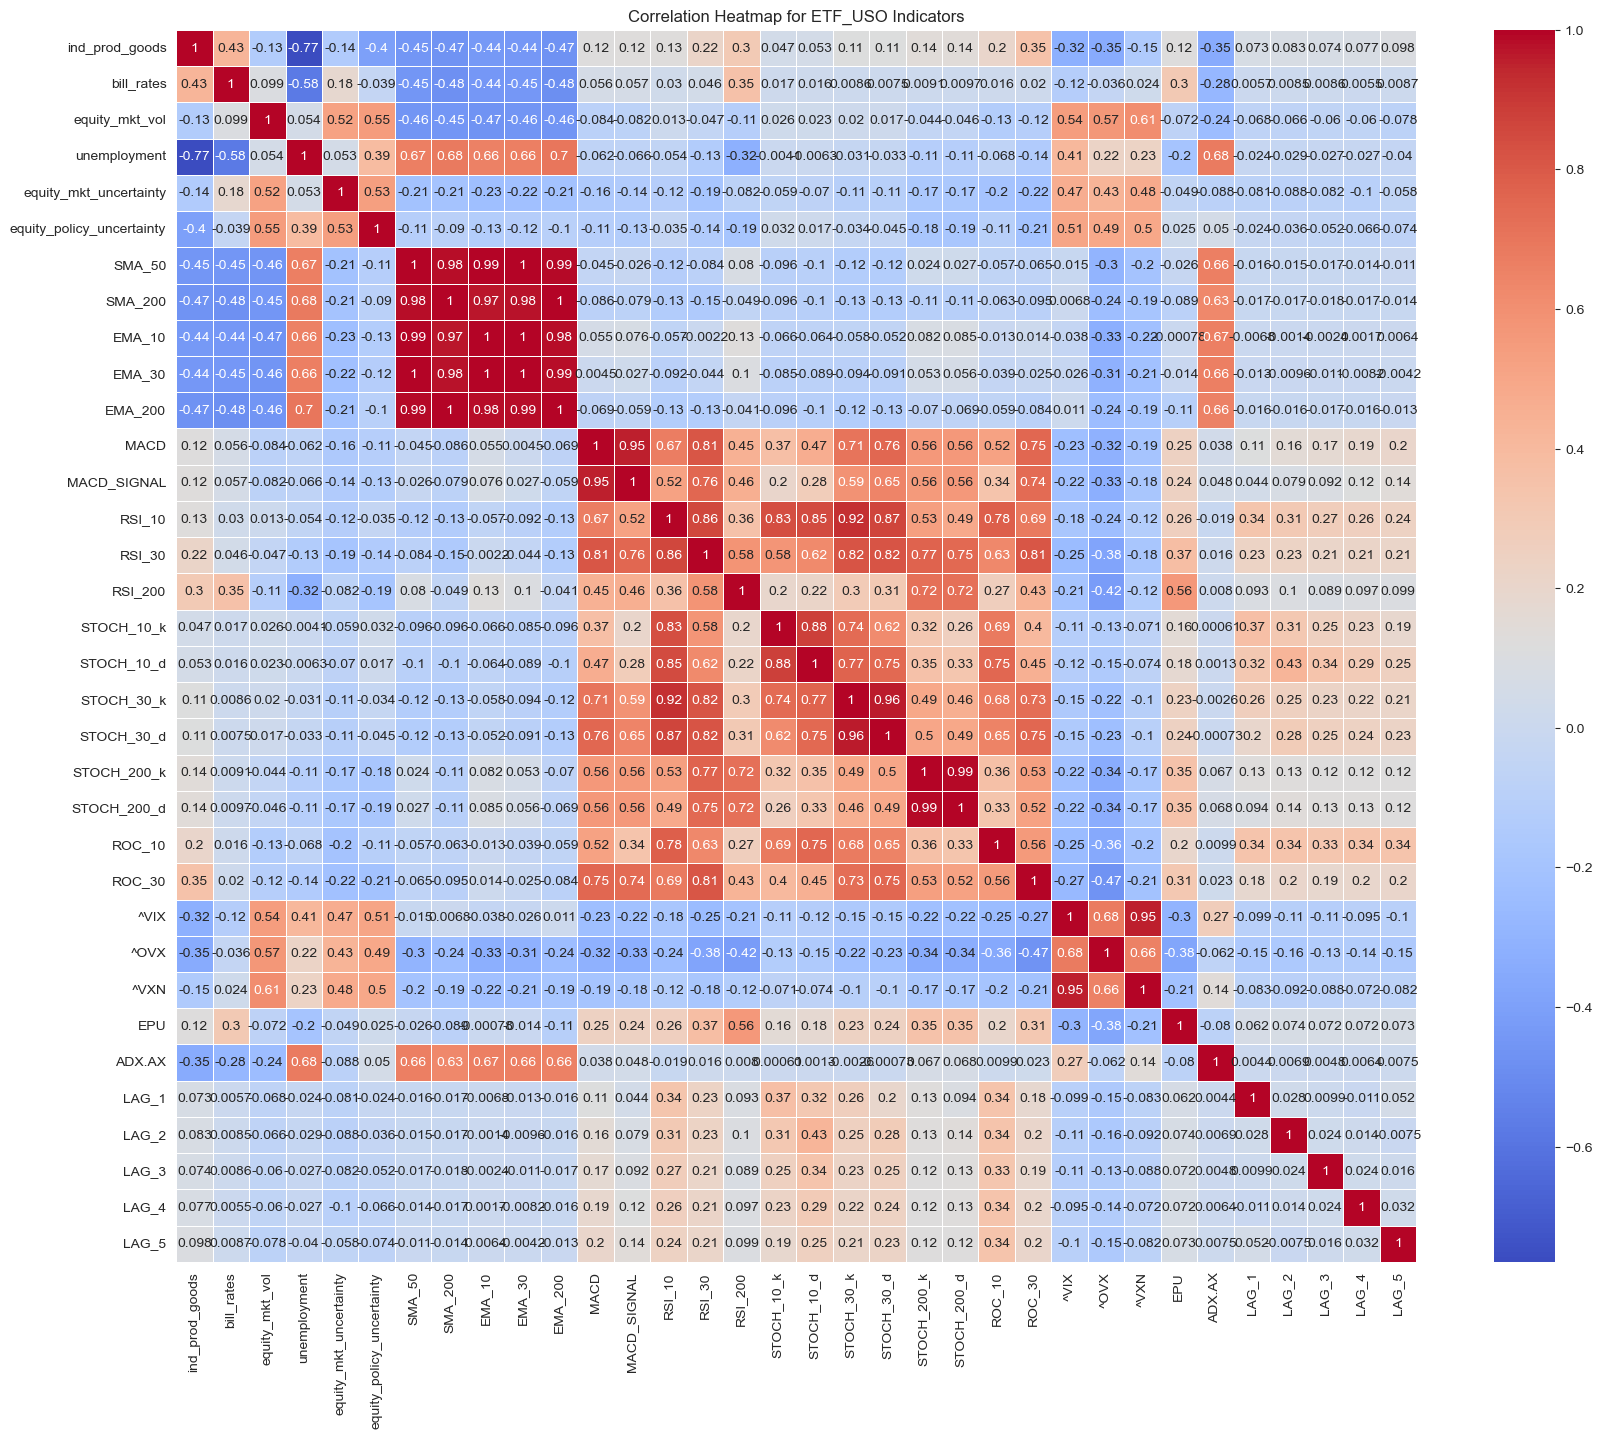

In [14]:
heatmap_for_indicators(dba_with_indicators, 'ETF_DBA Indicators')
heatmap_for_indicators(gld_with_indicators, 'ETF_GLD Indicators')
heatmap_for_indicators(uso_with_indicators, 'ETF_USO Indicators')

## PCA

In [15]:
# # 计算相关性矩阵
# corr_matrix_dba = dba_with_indicators.corr().abs()
# corr_matrix_gld = gld_with_indicators.corr().abs()
# corr_matrix_uso = uso_with_indicators.corr().abs()

In [16]:
# # 提取高度共线性的特征对
# def get_high_corr_features(corr_matrix, threshold=0.8):
#     high_corr_pairs = []
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if corr_matrix.iloc[i, j] > threshold:
#                 high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
#     return high_corr_pairs
# 
# high_corr_features_dba = get_high_corr_features(corr_matrix_dba)
# high_corr_features_gld = get_high_corr_features(corr_matrix_gld)
# high_corr_features_uso = get_high_corr_features(corr_matrix_uso)
# 
# # 打印高度共线性的特征对
# print('High correlation features in DBA:')
# print(high_corr_features_dba)
# 
# print('\nHigh correlation features in GLD:')
# print(high_corr_features_gld)
# 
# print('\nHigh correlation features in USO:')
# print(high_corr_features_uso)

In [17]:
# # 获取独特的特征列表
# def get_unique_features(high_corr_features):
#     features = set()
#     for pair in high_corr_features:
#         features.update(pair)
#     return list(features)
# 
# unique_features_dba = get_unique_features(high_corr_features_dba)
# unique_features_gld = get_unique_features(high_corr_features_gld)
# unique_features_uso = get_unique_features(high_corr_features_uso)

In [18]:
# print(unique_features_dba)

In [19]:
# # 应用PCA
# def apply_pca(data, features, n_components):
#     pca = PCA(n_components=n_components)
#     pca_data = pca.fit_transform(data[features])
#     pca_df = pd.DataFrame(data=pca_data, columns=[f'PCA_{i+1}' for i in range(n_components)])
#     return pca_df, pca
# 
# # 假设我们要将每组特征降维到2个主成分
# n_components = 2
# 
# # 对每个数据集应用PCA
# pca_dba_df, pca_dba = apply_pca(dba_with_indicators, unique_features_dba, n_components)
# pca_gld_df, pca_gld = apply_pca(gld_with_indicators, unique_features_gld, n_components)
# pca_uso_df, pca_uso = apply_pca(uso_with_indicators, unique_features_uso, n_components)

In [20]:
# # 将PCA结果与原始数据合并，并移除原始共线性特征
# dba_with_pca = dba_with_indicators.drop(columns=unique_features_dba).join(pca_dba_df)
# gld_with_pca = gld_with_indicators.drop(columns=unique_features_gld).join(pca_gld_df)
# uso_with_pca = uso_with_indicators.drop(columns=unique_features_uso).join(pca_uso_df)
# 
# # 检查新的DataFrame
# print(dba_with_pca.head())
# print(gld_with_pca.head())
# print(uso_with_pca.head())

## MIC

In [21]:
dba_with_indicators.isnull().sum().sum()
gld_with_indicators.isnull().sum().sum()
uso_with_indicators.isnull().sum().sum()

0

0

0

In [22]:
X_dba = dba_with_indicators.drop(['ETF_DBA','returns','PnL'], axis=1)
y_dba = dba_with_indicators['PnL']

X_gld = gld_with_indicators.drop(['ETF_GLD','returns','PnL'], axis=1)
y_gld = gld_with_indicators['PnL']

X_uso = uso_with_indicators.drop(['ETF_USO','returns','PnL'], axis=1)
y_uso = uso_with_indicators['PnL']

In [23]:
from sklearn.feature_selection import mutual_info_classif

def calculate_MIC(X, y, threshold=0.001):
    # 计算互信息
    mic_scores = mutual_info_classif(X, y, discrete_features='auto')
    
    # 输出互信息分数
    print("Mutual Information Scores:")
    print(mic_scores)
    
    # 筛选互信息大于阈值的特征
    selected_features = X.columns[mic_scores > threshold]
    print(f"Selected Features ({len(selected_features)}):")
    print(selected_features)
    
    return X[selected_features]

# 计算并筛选特征
X_dba_MIC = calculate_MIC(X_dba, y_dba)
X_gld_MIC = calculate_MIC(X_gld, y_gld)
X_uso_MIC = calculate_MIC(X_uso, y_uso)

Mutual Information Scores:
[0.         0.00522453 0.         0.01568272 0.         0.0079233
 0.         0.         0.         0.         0.00028982 0.000274
 0.00796356 0.06711102 0.03581844 0.         0.25381606 0.0601229
 0.1309032  0.02904025 0.05910907 0.00957888 0.02061831 0.00777474
 0.         0.         0.00340497 0.         0.00214397 0.00091247
 0.00124248 0.         0.00706657 0.00114086]
Selected Features (19):
Index(['bill_rates', 'unemployment', 'equity_policy_uncertainty',
       'MACD_SIGNAL', 'RSI_10', 'RSI_30', 'STOCH_10_k', 'STOCH_10_d',
       'STOCH_30_k', 'STOCH_30_d', 'STOCH_200_k', 'STOCH_200_d', 'ROC_10',
       'ROC_30', '^VXN', 'ADX.AX', 'LAG_2', 'LAG_4', 'LAG_5'],
      dtype='object')
Mutual Information Scores:
[0.         0.         0.         0.00082604 0.         0.
 0.         0.         0.         0.         0.         0.00787232
 0.00765513 0.0646433  0.03423845 0.01268312 0.24985884 0.06187645
 0.13336614 0.0217283  0.03224404 0.00989434 0.04263543 

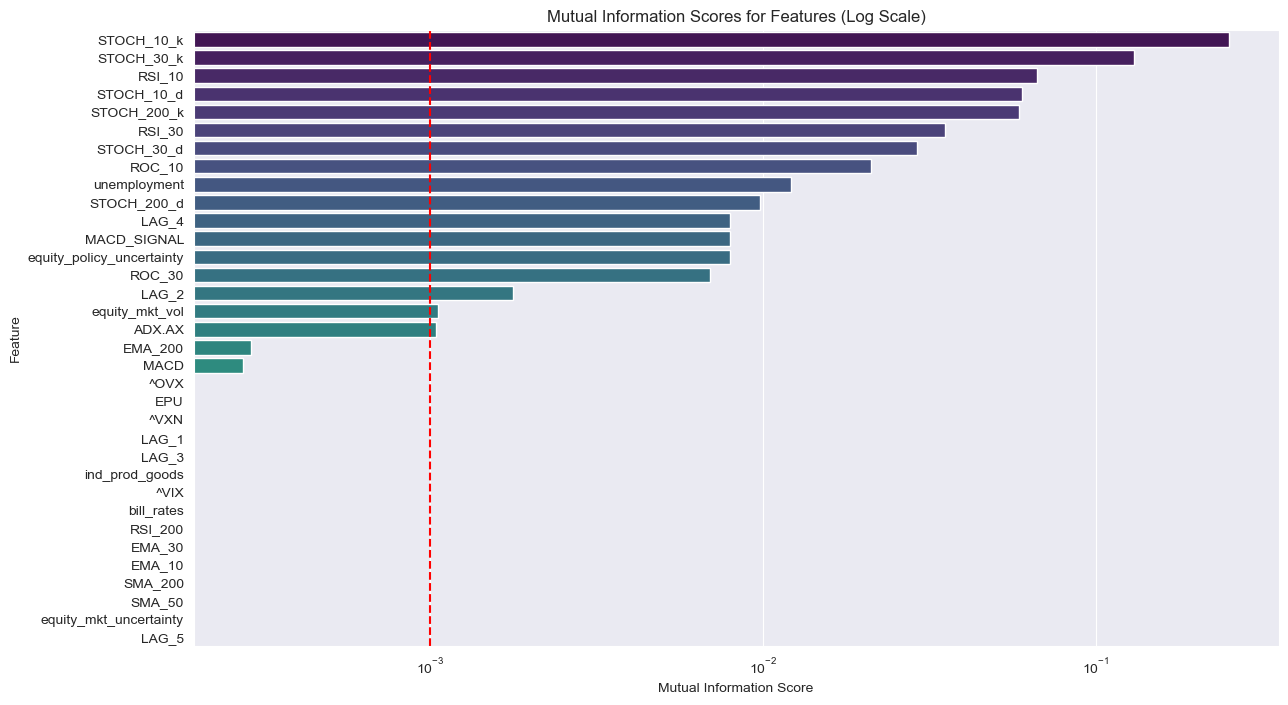

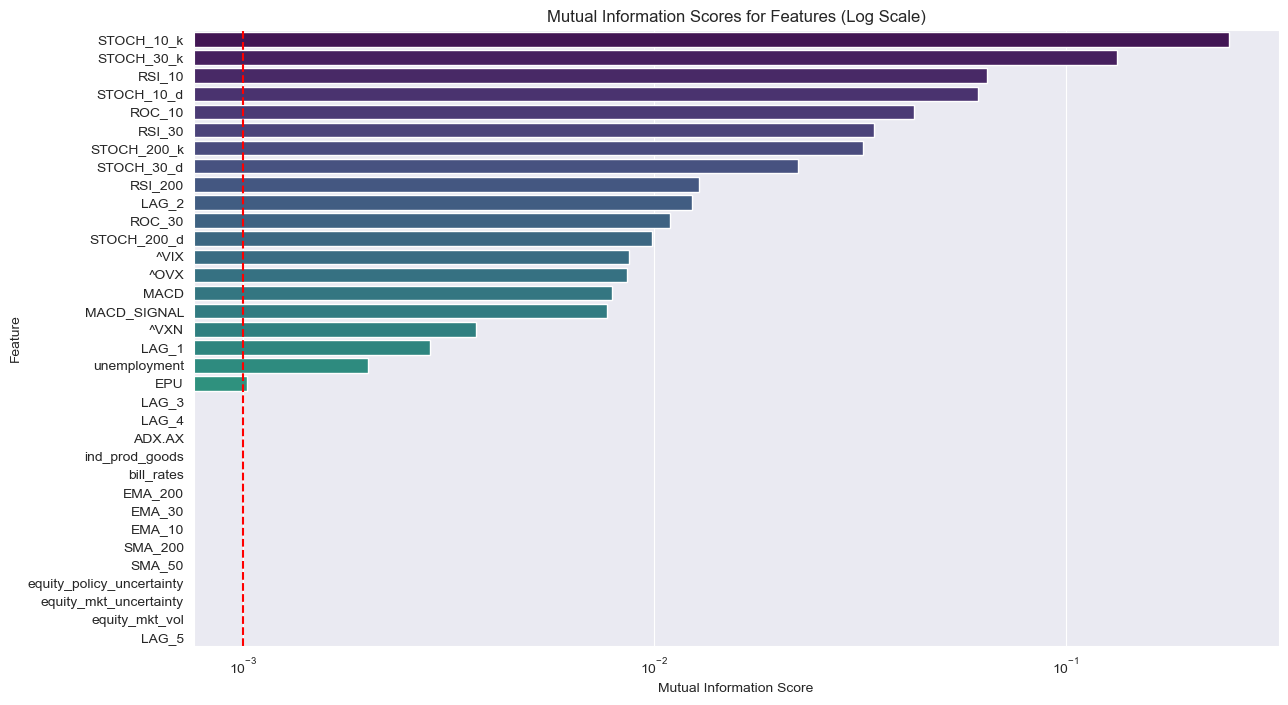

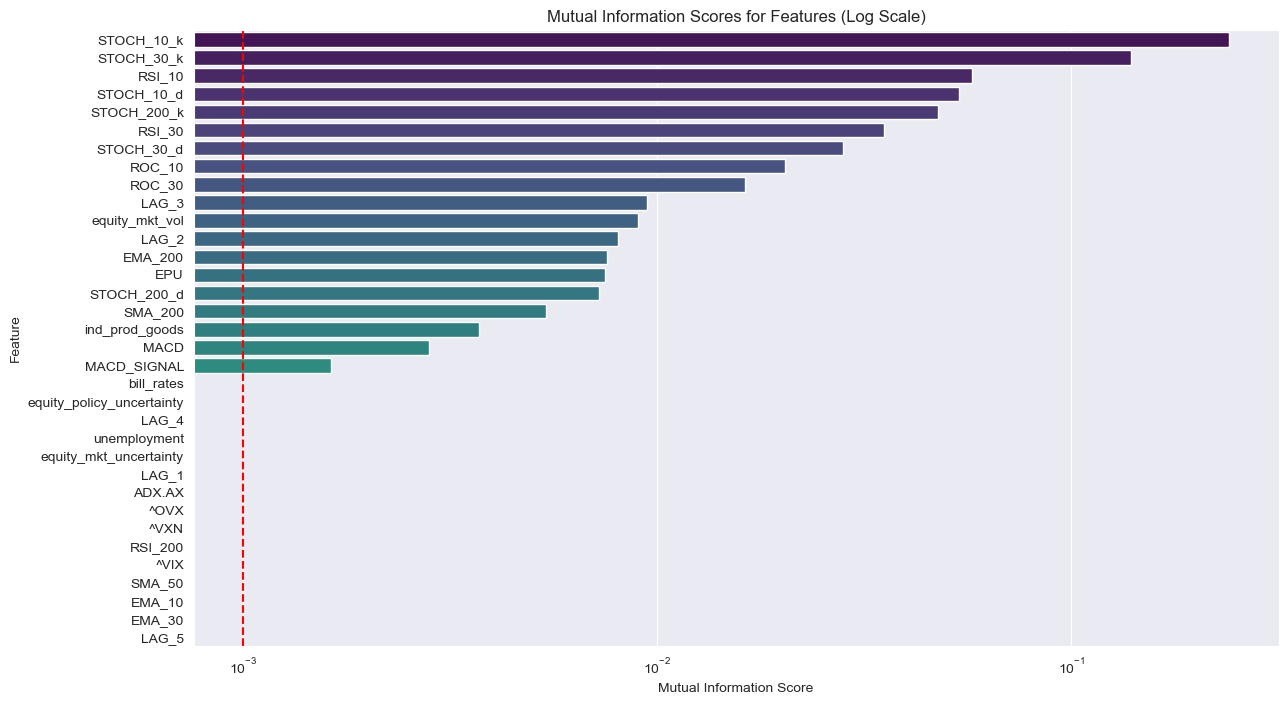

In [24]:
# 使用对数刻度绘制互信息分数
def plot_MIC_logscale(X, y, threshold=0.001):
    # 计算互信息
    mic_scores = mutual_info_classif(X, y, discrete_features='auto')
    
    # 创建一个DataFrame来存储特征名称及其互信息分数
    mic_df = pd.DataFrame({'Feature': X.columns, 'MIC': mic_scores})
    
    # 按互信息分数降序排序
    mic_df = mic_df.sort_values(by='MIC', ascending=False)
    
    # 绘制条形图
    plt.figure(figsize=(14, 8))
    sns.barplot(x='MIC', y='Feature', data=mic_df, palette='viridis')
    plt.axvline(x=threshold, color='r', linestyle='--')
    plt.title('Mutual Information Scores for Features (Log Scale)')
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Feature')
    plt.xscale('log')
    plt.show()
    
    # 返回互信息分数DataFrame
    return mic_df

# 可视化DBA数据集的互信息分数（对数刻度）
mic_df_dba_log = plot_MIC_logscale(X_dba, y_dba)

# 可视化GLD数据集的互信息分数（对数刻度）
mic_df_gld_log = plot_MIC_logscale(X_gld, y_gld)

# 可视化USO数据集的互信息分数（对数刻度）
mic_df_uso_log = plot_MIC_logscale(X_uso, y_uso)


## Sample Balanced

In [25]:
y_dba.value_counts()
y_gld.value_counts()
y_uso.value_counts()

0.0    1867
1.0    1727
Name: PnL, dtype: int64

1.0    1877
0.0    1717
Name: PnL, dtype: int64

1.0    1859
0.0    1735
Name: PnL, dtype: int64

Target is balanced, no need to resample

# Machine Learning

## Base Model

In [26]:
import os
import locale
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.utils import parallel_backend

In [27]:
# 定义一个函数来划分数据集
def split_data(X, y, test_size=0.2, val_size=0.4, random_state=42):
    # 将数据集分成训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # 将训练集进一步分为基模型训练集和验证集
    X_train_base, X_val, y_train_base, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)
    return X_train_base, X_val, X_test, y_train_base, y_val, y_test

# DBA数据集划分
X_dba_base, X_dba_val, X_dba_test, y_dba_base, y_dba_val, y_dba_test = split_data(X_dba_MIC, y_dba)

# GLD数据集划分
X_gld_base, X_gld_val, X_gld_test, y_gld_base, y_gld_val, y_gld_test = split_data(X_gld_MIC, y_gld)

# USO数据集划分
X_uso_base, X_uso_val, X_uso_test, y_uso_base, y_uso_val, y_uso_test = split_data(X_uso_MIC, y_uso)

# 打印输出以验证
print("DBA base set shape:", X_dba_base.shape, y_dba_base.shape)
print("DBA validation set shape:", X_dba_val.shape, y_dba_val.shape)
print("DBA test set shape:", X_dba_test.shape, y_dba_test.shape)

print("GLD base set shape:", X_gld_base.shape, y_gld_base.shape)
print("GLD validation set shape:", X_gld_val.shape, y_gld_val.shape)
print("GLD test set shape:", X_gld_test.shape, y_gld_test.shape)

print("USO base set shape:", X_uso_base.shape, y_uso_base.shape)
print("USO validation set shape:", X_uso_val.shape, y_uso_val.shape)
print("USO test set shape:", X_uso_test.shape, y_uso_test.shape)


DBA base set shape: (1725, 19) (1725,)
DBA validation set shape: (1150, 19) (1150,)
DBA test set shape: (719, 19) (719,)
GLD base set shape: (1725, 18) (1725,)
GLD validation set shape: (1150, 18) (1150,)
GLD test set shape: (719, 18) (719,)
USO base set shape: (1725, 19) (1725,)
USO validation set shape: (1150, 19) (1150,)
USO test set shape: (719, 19) (719,)


In [31]:
# 设置环境变量和编码
os.environ['LANG'] = 'en_US.UTF-8'
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# 设置随机种子
SEED = 42
np.random.seed(SEED)

# 定义模型和超参数搜索空间
model_params = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'ExtraTrees': (ExtraTreesClassifier(), {
        'n_estimators': Integer(10, 200),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': Integer(10, 200),
        'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
        'max_depth': Integer(1, 20),
        'min_samples_split': Integer(2, 10)
    }),
    'SVM': (SVC(probability=True), {
        'C': Real(1e-3, 1e+3, prior='log-uniform'),  # 缩小搜索范围
        'gamma': Real(1e-4, 1e+1, prior='log-uniform'),  # 缩小搜索范围
        'kernel': Categorical(['linear', 'rbf'])
    }),
    'NaiveBayes': (GaussianNB(), {
        'var_smoothing': Real(1e-12, 1e-6, prior='log-uniform')
    })
}


'en_US.UTF-8'

In [37]:
# 定义函数：超参数优化和模型评估
def optimize_and_evaluate(model, param_dist, X_train, y_train, X_val, y_val):
    opt = BayesSearchCV(model, search_spaces=param_dist, n_iter=30, cv=3, n_jobs=-1, random_state=SEED, scoring='accuracy')
    
    with parallel_backend('threading'):
        opt.fit(X_train, y_train)
    
    best_model = opt.best_estimator_
    y_pred = best_model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    return {
        'model': best_model,
        'accuracy': accuracy,
        'f1': f1,
        'kappa': kappa,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

# 定义函数：处理数据集并进行模型训练和评估
def process_and_evaluate(datasets, model_params):
    results = {dataset: {} for dataset in datasets}
    
    for dataset_name, (X_train, y_train, X_val, y_val) in datasets.items():
        print(f"Processing {dataset_name} dataset...")
        for model_name, (model, param_dist) in model_params.items():
            print(f"Optimizing {model_name} for {dataset_name} dataset...")
            result = optimize_and_evaluate(model, param_dist, X_train, y_train, X_val, y_val)
            results[dataset_name][model_name] = result
    return results

# 定义函数：可视化评估结果
def visualize_results(results):
    for dataset_name, dataset_results in results.items():
        accuracies = [metrics['accuracy'] for model, metrics in dataset_results.items()]
        f1_scores = [metrics['f1'] for model, metrics in dataset_results.items()]
        kappas = [metrics['kappa'] for model, metrics in dataset_results.items()]

        bar_width = 0.25
        r1 = np.arange(len(dataset_results))
        r2 = [x + bar_width for x in r1]
        r3 = [x + bar_width for x in r2]

        plt.figure(figsize=(14, 8))
        plt.bar(r1, accuracies, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
        plt.bar(r2, f1_scores, color='g', width=bar_width, edgecolor='grey', label='F1 Score')
        plt.bar(r3, kappas, color='r', width=bar_width, edgecolor='grey', label='Kappa')
        
        plt.xlabel('Model', fontweight='bold')
        plt.xticks([r + bar_width for r in range(len(dataset_results))], dataset_results.keys())
        plt.title(f'{dataset_name} Dataset Model Performance')
        plt.legend()
        plt.show()

Processing DBA dataset...
Optimizing RandomForest for DBA dataset...
Optimizing ExtraTrees for DBA dataset...
Optimizing GradientBoosting for DBA dataset...
Optimizing SVM for DBA dataset...
Optimizing NaiveBayes for DBA dataset...
Processing GLD dataset...
Optimizing RandomForest for GLD dataset...
Optimizing ExtraTrees for GLD dataset...
Optimizing GradientBoosting for GLD dataset...
Optimizing SVM for GLD dataset...
Optimizing NaiveBayes for GLD dataset...
Processing USO dataset...
Optimizing RandomForest for USO dataset...
Optimizing ExtraTrees for USO dataset...
Optimizing GradientBoosting for USO dataset...
Optimizing SVM for USO dataset...
Optimizing NaiveBayes for USO dataset...


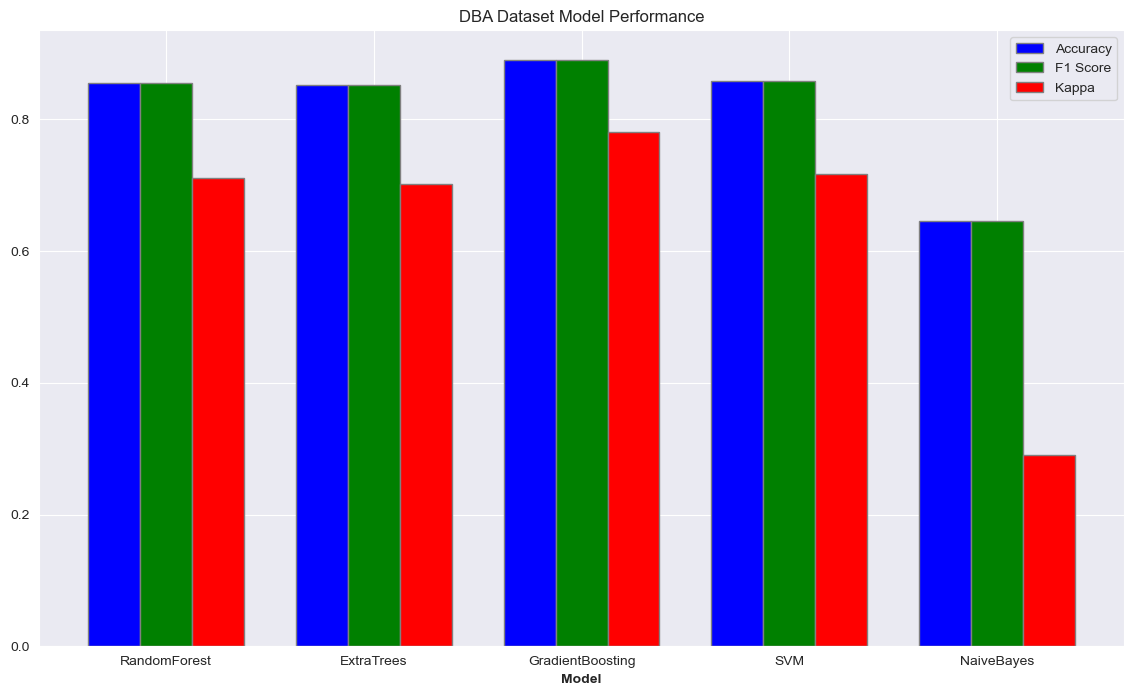

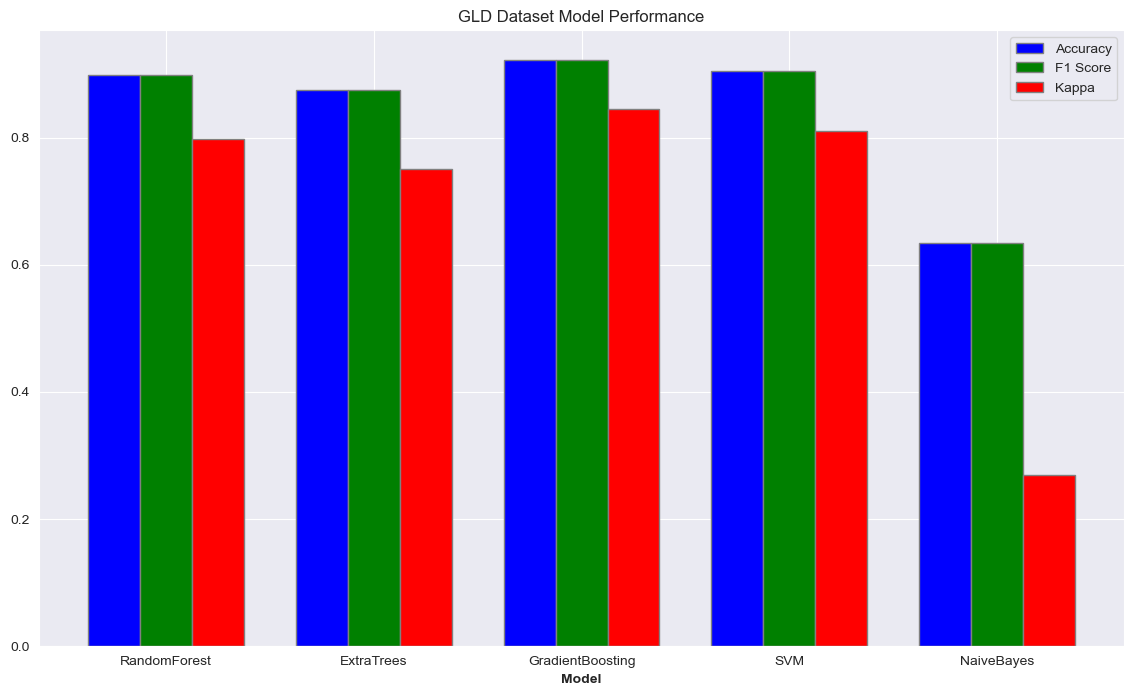

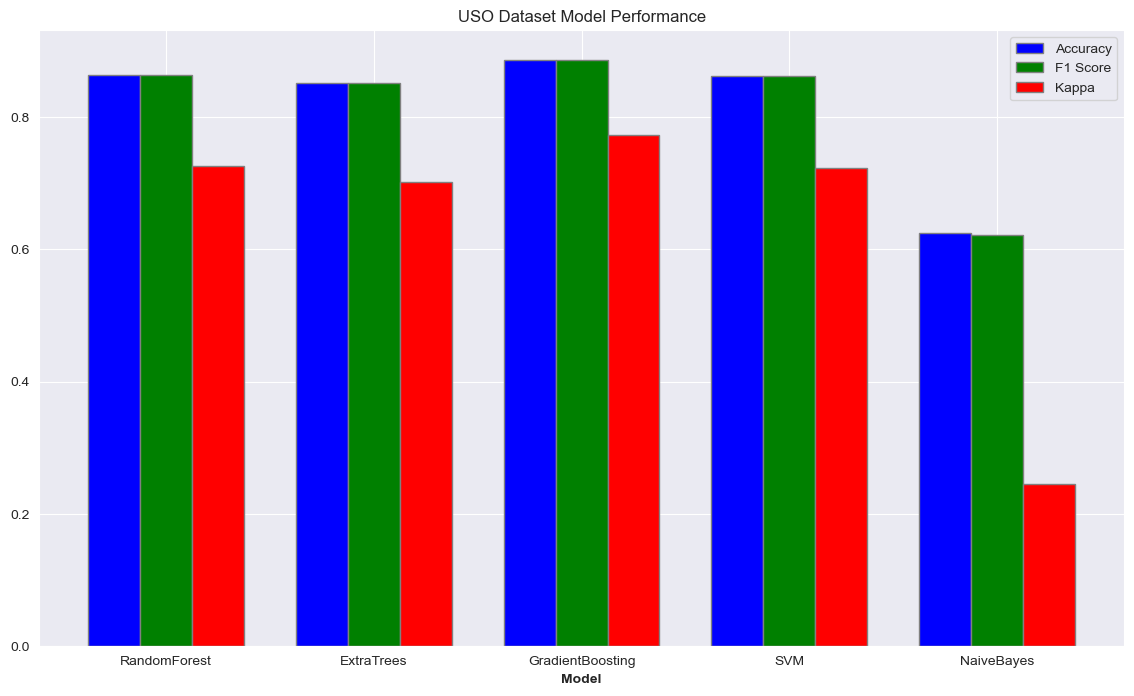

DBA Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.8557
F1: 0.8556
Kappa: 0.7111
Precision: 0.8559
Recall: 0.8557
Confusion Matrix:
[[510  74]
 [ 92 474]]

EXTRATREES Model:
Accuracy: 0.8513
F1: 0.8513
Kappa: 0.7024
Precision: 0.8514
Recall: 0.8513
Confusion Matrix:
[[505  79]
 [ 92 474]]

GRADIENTBOOSTING Model:
Accuracy: 0.8904
F1: 0.8904
Kappa: 0.7808
Precision: 0.8905
Recall: 0.8904
Confusion Matrix:
[[525  59]
 [ 67 499]]

SVM Model:
Accuracy: 0.8583
F1: 0.8583
Kappa: 0.7165
Precision: 0.8583
Recall: 0.8583
Confusion Matrix:
[[500  84]
 [ 79 487]]

NAIVEBAYES Model:
Accuracy: 0.6452
F1: 0.6452
Kappa: 0.2901
Precision: 0.6452
Recall: 0.6452
Confusion Matrix:
[[384 200]
 [208 358]]
GLD Dataset Model Evaluation Results:

RANDOMFOREST Model:
Accuracy: 0.8991
F1: 0.8991
Kappa: 0.7980
Precision: 0.8991
Recall: 0.8991
Confusion Matrix:
[[496  57]
 [ 59 538]]

EXTRATREES Model:
Accuracy: 0.8757
F1: 0.8755
Kappa: 0.7506
Precision: 0.8759
Recall: 0.8757
Confusion Matrix:

In [38]:
datasets = {
    'DBA': (X_dba_base, y_dba_base, X_dba_val, y_dba_val),
    'GLD': (X_gld_base, y_gld_base, X_gld_val, y_gld_val),
    'USO': (X_uso_base, y_uso_base, X_uso_val, y_uso_val)
}

# 处理数据集并进行模型训练和评估
results = process_and_evaluate(datasets, model_params)

# 可视化评估结果
visualize_results(results)

# 打印评估结果
for dataset_name, dataset_results in results.items():
    print(f"{dataset_name} Dataset Model Evaluation Results:")
    for model_name, metrics in dataset_results.items():
        print(f"\n{model_name.upper()} Model:")
        for metric, value in metrics.items():
            if metric == 'confusion_matrix':
                print(f"{metric.replace('_', ' ').title()}:\n{value}")
            elif metric == 'model':
                continue
            else:
                print(f"{metric.replace('_', ' ').title()}: {value:.4f}")

## Meta Model

In [52]:
from sklearn.base import clone

# 定义函数：将训练好的基模型保存并进行预测
def train_base_models(base_models, X_train, y_train):
    trained_models = {}
    for model_name, model in base_models.items():
        model.fit(X_train, y_train)
        trained_models[model_name] = model
    return trained_models

def predict_with_models(trained_models, X_val):
    base_predictions = []
    for model_name, model in trained_models.items():
        y_val_pred = model.predict_proba(X_val)[:, 1]  # Assuming a binary classification task
        base_predictions.append(y_val_pred)
    X_meta = np.column_stack(base_predictions)
    return X_meta

def evaluate_model(y_true, y_pred):
    results = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),  # 添加 f1
        'kappa': cohen_kappa_score(y_true, y_pred)  # 添加 kappa
    }
    return results


# 定义函数：训练堆叠模型并进行评估
def train_and_evaluate_stacking(base_models, X_train, y_train, X_val, y_val, X_test, y_test, search_spaces, random_state=42):
    trained_models = train_base_models(base_models, X_train, y_train)
    X_meta_train = predict_with_models(trained_models, X_val)
    
    meta_model = AdaBoostClassifier(random_state=random_state)
    opt = BayesSearchCV(meta_model, search_spaces, n_iter=30, cv=3, n_jobs=-1, random_state=random_state, scoring='accuracy')
    
    with parallel_backend('threading'):
        opt.fit(X_meta_train, y_val)
    
    best_meta_model = opt.best_estimator_
    
    X_meta_test = predict_with_models(trained_models, X_test)
    y_test_pred = best_meta_model.predict(X_meta_test)
    
    evaluation_results = evaluate_model(y_test, y_test_pred)
    evaluation_results['meta_model'] = best_meta_model  # Save the meta-model if needed later
    return evaluation_results, trained_models, best_meta_model

def predict_with_stacking_model(base_models, meta_model, X):
    X_meta = predict_with_models(base_models, X)
    return meta_model.predict(X_meta)

In [53]:
# 假设在每个数据集上训练好的基模型保存在results字典中
base_models_dba = {model_name: clone(result['model']) for model_name, result in results['DBA'].items()}
base_models_gld = {model_name: clone(result['model']) for model_name, result in results['GLD'].items()}
base_models_uso = {model_name: clone(result['model']) for model_name, result in results['USO'].items()}

# 定义元模型的超参数搜索空间
search_spaces = {
    'n_estimators': Integer(50, 200),
    'learning_rate': Real(0.01, 1.0, prior='log-uniform')
}

# 进行堆叠模型的训练和评估
stacking_results_dba, trained_base_models_dba, best_meta_model_dba = train_and_evaluate_stacking(
    base_models_dba, X_dba_base, y_dba_base, X_dba_val, y_dba_val, X_dba_test, y_dba_test, search_spaces
)
stacking_results_gld, trained_base_models_gld, best_meta_model_gld = train_and_evaluate_stacking(
    base_models_gld, X_gld_base, y_gld_base, X_gld_val, y_gld_val, X_gld_test, y_gld_test, search_spaces
)
stacking_results_uso, trained_base_models_uso, best_meta_model_uso = train_and_evaluate_stacking(
    base_models_uso, X_uso_base, y_uso_base, X_uso_val, y_uso_val, X_uso_test, y_uso_test, search_spaces
)

In [54]:
# 打印堆叠模型的评估结果
def print_evaluation_results(stacking_results, dataset_name):
    print(f"{dataset_name} Dataset Stacking Model Evaluation Results:")
    for metric, value in stacking_results.items():
        if metric == 'meta_model':
            continue
        print(f"{metric.replace('_', ' ').title()}: {value:.4f}")

print_evaluation_results(stacking_results_dba, "DBA")
print_evaluation_results(stacking_results_gld, "GLD")
print_evaluation_results(stacking_results_uso, "USO")

DBA Dataset Stacking Model Evaluation Results:
Accuracy: 0.8846
Precision: 0.8873
Recall: 0.8746
F1: 0.8809
Kappa: 0.7689
GLD Dataset Stacking Model Evaluation Results:
Accuracy: 0.9360
Precision: 0.9409
Recall: 0.9358
F1: 0.9383
Kappa: 0.8719
USO Dataset Stacking Model Evaluation Results:
Accuracy: 0.8790
Precision: 0.9155
Recall: 0.8441
F1: 0.8783
Kappa: 0.7584


In [55]:
# # 对新数据进行预测
# X_new = np.random.rand(10, X_dba_base.shape[1])  # 假设X_new是新的数据
# y_pred_dba = predict_with_stacking_model(trained_base_models_dba, best_meta_model_dba, X_new)
# y_pred_gld = predict_with_stacking_model(trained_base_models_gld, best_meta_model_gld, X_new)
# y_pred_uso = predict_with_stacking_model(trained_base_models_uso, best_meta_model_uso, X_new)
# 
# print("Predictions for new data (DBA):", y_pred_dba)
# print("Predictions for new data (GLD):", y_pred_gld)
# print("Predictions for new data (USO):", y_pred_uso)

## Plotting

In [56]:
# 可视化堆叠模型的评估结果
def extract_base_metrics(results, dataset_name, metrics):
    base_model_names = list(results[dataset_name].keys())
    base_metrics = {metric: [results[dataset_name][model][metric] for model in base_model_names] for metric in metrics}
    return base_metrics, base_model_names

def extract_stacking_metrics(stacking_results, metrics):
    stack_metrics = {metric: stacking_results[metric] for metric in metrics}
    return stack_metrics

def plot_metrics(ax, base_model_names, base_metrics, stack_metrics, metric_name):
    ax.plot(base_model_names, base_metrics[metric_name], label='Base Models', marker='o')
    ax.axhline(y=stack_metrics[metric_name], color='r', linestyle='-', label='Stacking Model')
    ax.set_title(f'{metric_name.capitalize()} Score')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.legend()

def visualize_results(results, stacking_results, datasets):
    metrics = ['accuracy', 'f1', 'kappa']
    
    for dataset_name in datasets:
        base_metrics, base_model_names = extract_base_metrics(results, dataset_name, metrics)
        stack_metrics = extract_stacking_metrics(stacking_results[dataset_name], metrics)
        
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        for i, metric in enumerate(metrics):
            plot_metrics(axs[i], base_model_names, base_metrics, stack_metrics, metric)
        
        fig.suptitle(f'{dataset_name} Dataset Performance Comparison')
        plt.show()

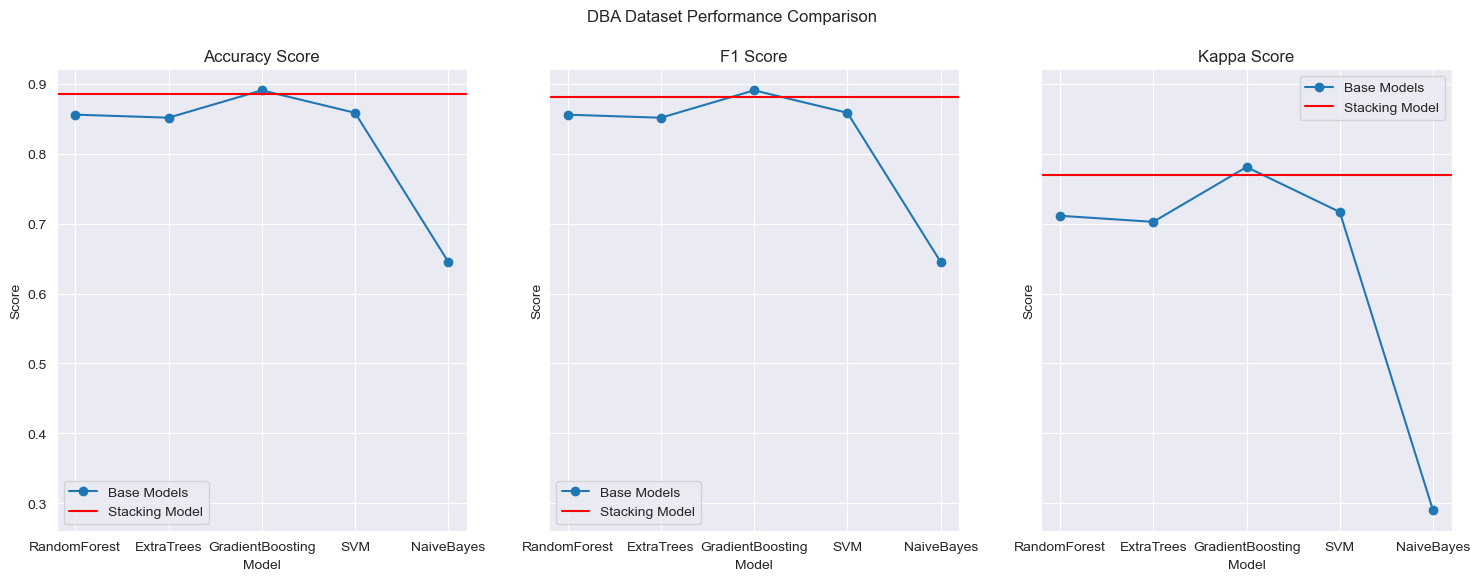

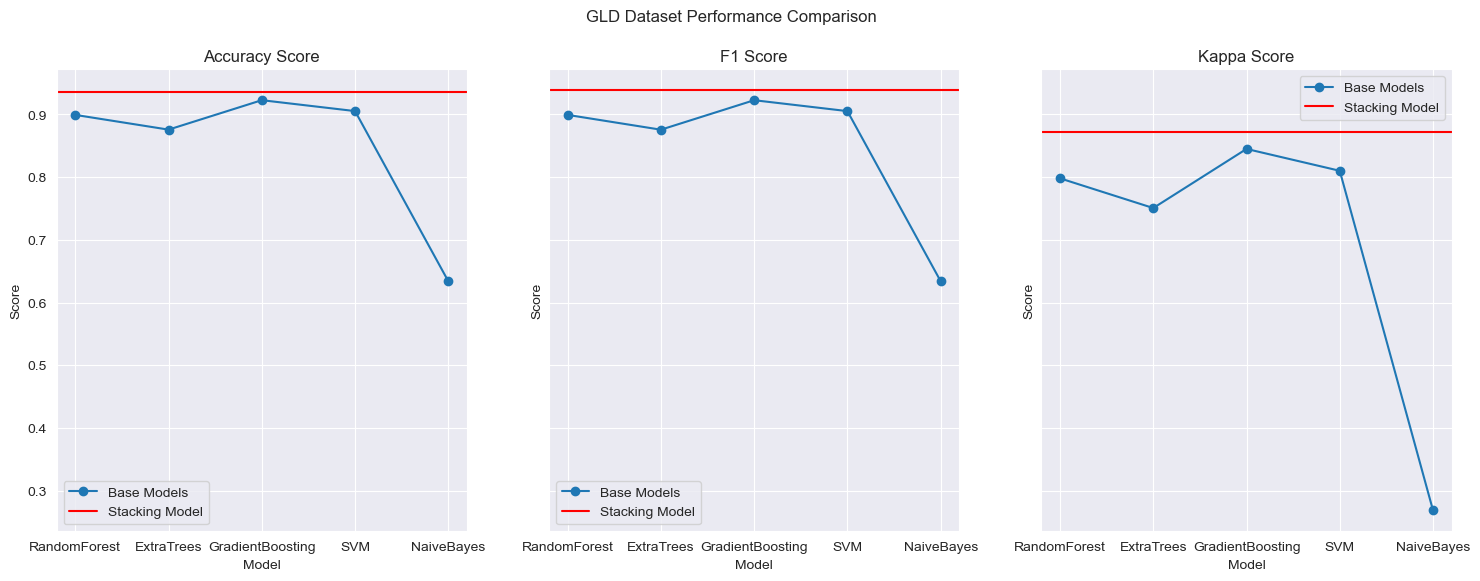

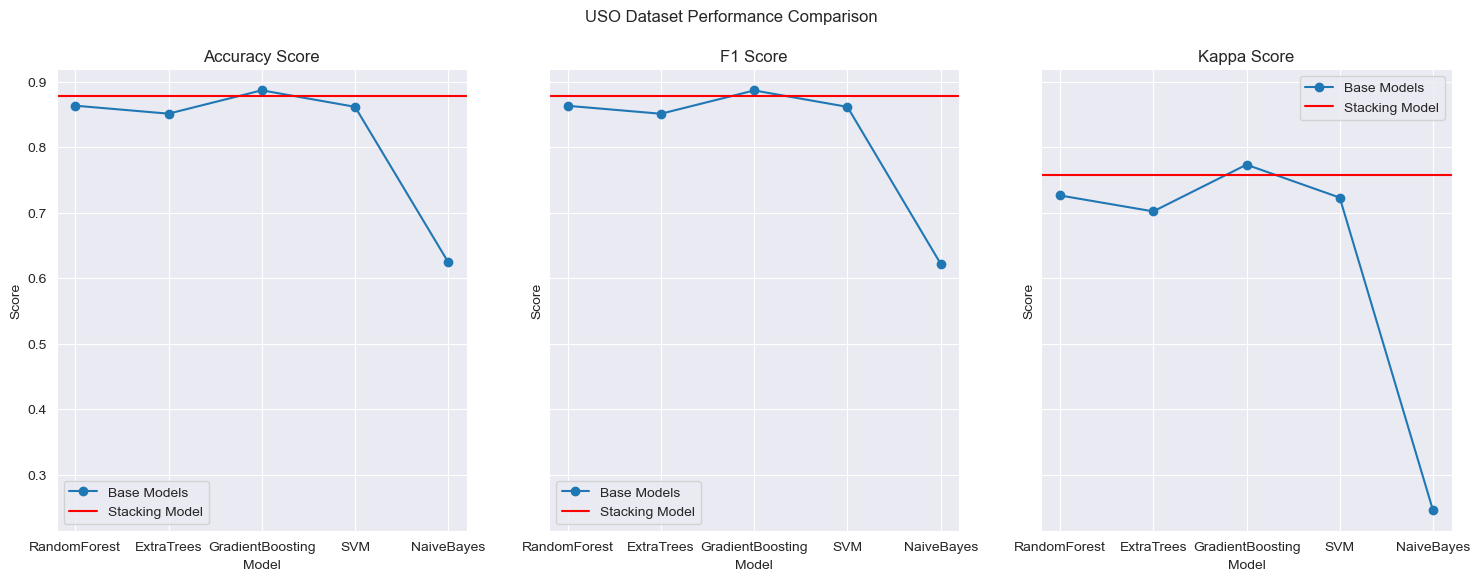

In [57]:
# 可视化结果
visualize_results(results, {
    'DBA': stacking_results_dba,
    'GLD': stacking_results_gld,
    'USO': stacking_results_uso
}, datasets)